## 데이터 불러오기
Q. data 폴더 안에 있는 '서울시 구별 CCTV 개수 현황 데이터'(01. CCTV_in_Seoul.csv) 불러와서 'CCTV_Seoul'이라는 데이터 프레임 만들기

In [107]:
import pandas as pd
CCTV_Seoul = pd.read_csv('./data/01. CCTV_in_Seoul.csv', encoding='UTF-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


Q.CCTV_Seoul 데이터 프레임의 칼럼명을 모두 뽑고,'기관명' -> '구별'로 바꾸기

In [108]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [109]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


Q. data 폴더 안에 있는 '서울시 구별 인구 현황 데이터'(01. population_in_Seoul.xls 불러와서 'pop_Seoul'이라는 데이터 프레임 만들기
-  '자치구','인구' ,'한국인','외국인','고령자' 만 가져오기

In [110]:
pop_Seoul = pd.read_excel('./data/01. population_in_Seoul.xls',
                          header = 2,
                          parse_cols = 'B,D,G,J,N',
                          encoding='utf-8')
pop_Seoul.head()

C:\Users\user\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  after removing the cwd from sys.path.


,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


Q. pop_Seoul의 칼럼 이름 바꿔서 아래처럼 만들기
![python image](./tmp/01_01.JPG)

In [111]:
pop_Seoul.rename(columns= {pop_Seoul.columns[0] :'구별',
                           pop_Seoul.columns[1] :'인구수',
                           pop_Seoul.columns[2] :'한국인',
                           pop_Seoul.columns[3] :'외국인',
                           pop_Seoul.columns[4] :'고령자'}, inplace =True)


pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [112]:
print('서울시 구별 CCTV 현황')
display(CCTV_Seoul.head())

print('서울시 구별 인구 현황')
display(pop_Seoul.head())

서울시 구별 CCTV 현황


,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


서울시 구별 인구 현황


,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


Q. CCTV 개수가 적은 5개의 구, 많은 5개의 구 뽑기 

In [113]:
CCTV_Seoul.sort_values(by ='소계', ascending= True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [114]:
CCTV_Seoul.sort_values(by ='소계', ascending= False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


Q. CCTV_Seoul 데이터프레임에 2013년도 이전과 비교해 최근3년(2014~2016)동안 CCTV가 얼마나 증가했는지를 보여주는 '최근증가율'칼럼 만들기 

Q. 최근증가율 높은 순서대로 CCTV_Seoul 데이터 프레임 보여주기

In [115]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년']+ CCTV_Seoul['2015년']+
                       CCTV_Seoul['2014년'])/CCTV_Seoul['2013년도 이전'] *100

CCTV_Seoul.sort_values(by = '최근증가율', ascending= False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


Q. pop_Seoul의 데이터프레임에 필요없는 첫번째 행( 합계) 지우기

In [116]:
display(pop_Seoul.head())
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


Q.pop_Seoul 데이터프레임의 '구별'칼럼의 값들 뽑아보기 (중복제거해서)

Q. nan 값 있으면 어디에 있는지 찾고 삭제하기

In [117]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [118]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [119]:
pop_Seoul.drop([26], inplace=True)

Q. pop_Seoul 데이터프레임에서 인구수대비 외국인 수를 보여주는 '외국인비율' 칼럼 만들기

Q. pop_Seoul 데이터프레임에서 인구수대비 고령자 수를 보여주는 '고령자비율' 칼럼 만들기

In [120]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인']/ pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자']/ pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


Q. pop_Seoul 데이터프레임에서 '인구수'가 높은 순서대로 프레임 보여주기

In [121]:
pop_Seoul.sort_values(by = '인구수', ascending =False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


Q. '외국인(수)가 높은 서울시 구'와 '외국인 비율이 높은 서울시 구' 비교해서 보여주기

In [122]:
print('외국인(수)가 높은 서울시 구')
display(pop_Seoul.sort_values(by = '외국인', ascending =False).head())

print('외국인 비율이 높은 서울시 구')
display(pop_Seoul.sort_values(by = '외국인비율', ascending =False).head())

외국인(수)가 높은 서울시 구


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


외국인 비율이 높은 서울시 구


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


Q. '고령자(수)가 높은 서울시 구'와 '고령자 비율이 높은 서울시 구' 비교해서 보여주기

In [123]:
print('고령자(수)가 높은 서울시 구')
display(pop_Seoul.sort_values(by = '고령자', ascending =False).head())

print('고령자 비율이 높은 서울시 구')
display(pop_Seoul.sort_values(by = '고령자비율', ascending =False).head())

고령자(수)가 높은 서울시 구


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


고령자 비율이 높은 서울시 구


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


Q. 두 데이터 프레임을 합친 'data_result'프레임 만들기 (합칠때 기준은?)

In [126]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on = '구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


Q. 필요없는 칼럼 삭제하기 
힌트 : 2013년도 이전, 2014년, 2015년, 2016년

In [127]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


Q. 기준으로 정한 칼럼을 index로 지정하기

In [128]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


Q. data_result 칼럼들의 상관계수 구하기
- CCTV 개수와 가장 밀접한 관련이 있는 칼럼 찾기

Q. 두 칼럼의 값이 큰 순서대로 각각 data_result 프레임 보여주기

In [129]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.343016,0.306342,0.304287,-0.023786,0.255196,-0.136074,-0.280786
최근증가율,-0.343016,1.000000,-0.093068,-0.082511,-0.150463,-0.070969,-0.044042,0.185089
인구수,0.306342,-0.093068,1.000000,0.998061,-0.153371,0.932667,-0.591939,-0.669462
한국인,0.304287,-0.082511,0.998061,1.000000,-0.214576,0.931636,-0.637911,-0.660812
외국인,-0.023786,-0.150463,-0.153371,-0.214576,1.000000,-0.155381,0.838904,-0.014055
고령자,0.255196,-0.070969,0.932667,0.931636,-0.155381,1.000000,-0.606088,-0.380468
외국인비율,-0.136074,-0.044042,-0.591939,-0.637911,0.838904,-0.606088,1.000000,0.267348
고령자비율,-0.280786,0.185089,-0.669462,-0.660812,-0.014055,-0.380468,0.267348,1.000000


In [130]:
print('CCTV가 많이 설치된 구')
display(data_result.sort_values(by ='소계', ascending='False').head())

print('인구수가 많은 구')
display(data_result.sort_values(by ='인구수', ascending='False').head())

CCTV가 많이 설치된 구


,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507
마포구,574,212.101911,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
중랑구,660,79.960707,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885
중구,671,147.699758,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909


인구수가 많은 구


,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
중구,671,147.699758,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
종로구,1002,248.922414,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
성동구,1062,81.780822,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689


In [131]:
# matplotlib 한글 깨지는 문제 해결하는 방법 (맥, 윈도우 둘다)
import matplotlib.pyplot as plt
import platform 
from matplotlib import font_manager, rc

plt.style.use(['seaborn']) #뒷배경 하얗게 하기 위한 스타일 설정 코드

plt.rcParams['axes.unicode_minus'] = False

if platform.system() =='Darwin':
    rc('font', family='AppleGothic')
elif platform.system() =='Windows':
    path= 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family=font_name)

Q. 다음 그림처럼 시각화하기
![python image](./tmp/01_02.JPG)

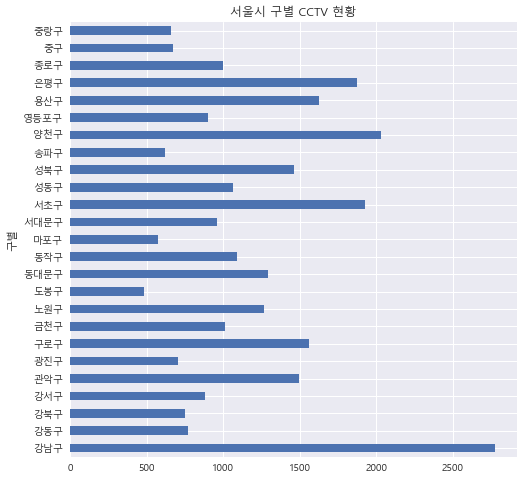

In [132]:
data_result['소계'].plot(kind='barh', grid='True', figsize=(8,8), title='서울시 구별 CCTV 현황')
plt.show()

Q. CCTV가 많은 구 순서대로 정렬해서 시각화하기

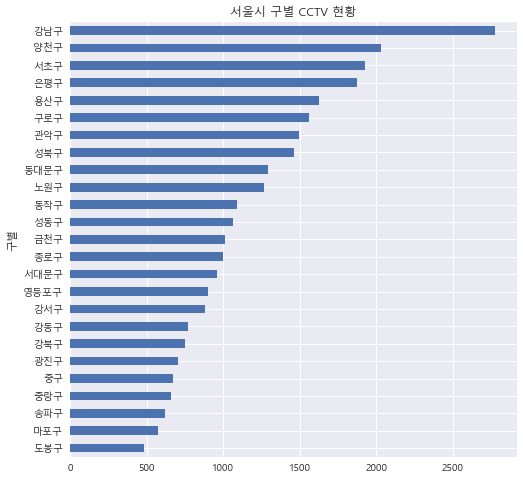

In [133]:
data_result['소계'].sort_values().plot(kind ='barh', grid=True, title ='서울시 구별 CCTV 현황',figsize=(8,8))
plt.show()

Q. 인구수 대비 CCTV 개수를 확인할수 있는 'CCTV비율'이라는 새 칼럼 만들기

Q. CCTV비율의 값, 오름차순으로 data_result 프레임 보여주기

In [134]:
data_result['CCTV비율'] = (data_result['소계']/ data_result['인구수']) * 100
data_result.sort_values(by = 'CCTV비율', ascending='True').head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587
도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.139110
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413
마포구,574,212.101911,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110,0.147312
중랑구,660,79.960707,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885,0.159227


Q. 다음 그림처럼 시각화하기
![python image](./tmp/01_03.JPG)

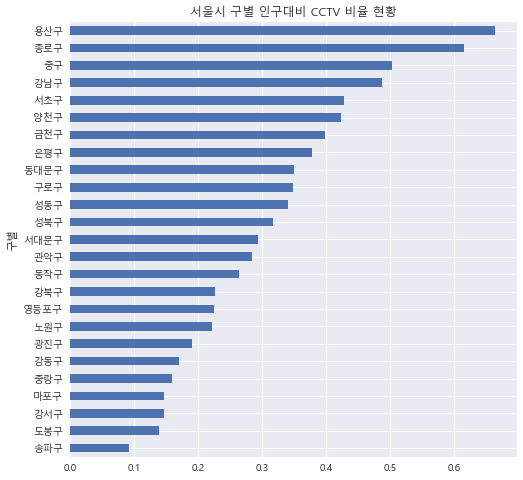

In [135]:
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, title='서울시 구별 인구대비 CCTV 비율 현황', figsize=(8,8))
plt.show()

Q. 다음 그림처럼 시각화하기
![python image](./tmp/01_04.JPG)

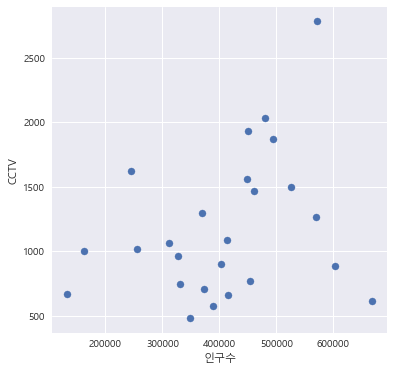

In [136]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

Q. 상관관계가 있는 수 칼럼을 잘 대표하는 하나의 직선(회귀식) 만들기

    1) 회귀계수 뽑기 (fp1)
    2) 회귀식 만들기 (f1)
    3) 100000 ~ 700000 사이에서 100개의 x값 만들기(fx)

In [137]:
import numpy as np
#1
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)
print(fp1)
#2
f1 = np.poly1d(fp1)
print(f1) 
#3
fx = np.linspace(100000, 700000, 100) # x,y 좌표 

[1.30916415e-03 6.45066497e+02]
 
0.001309 x + 645.1


Q. 아까 만든 산점도에 사진처럼 회귀선 띄우기 
![python image](./tmp/01_05.JPG)

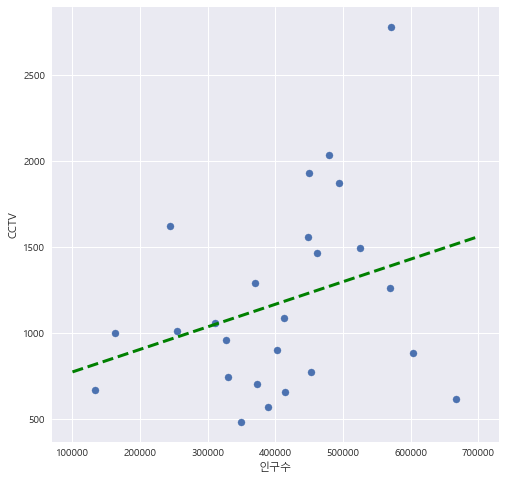

In [138]:
plt.figure(figsize=(8,8))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')  #선 그려주기
plt.xlabel('인구수')
plt.ylabel('CCTV')

plt.show()

Q. 회귀 값과 진짜 CCTV 개수와의 차이를 계산해서 '오차'라는 새로운 칼럼 만들기 

Q. 오차가 큰 순서대로 data_result 프레임을 보여정렬해서 'df_sort'라는 새로운 프레임 만들기

In [139]:
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by = '오차', ascending =False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


Q. 회귀선있는 산점도에 다음 기능 추가하기 

    1) 산점도의 점의 색상을 '오차' 칼럼의 값으로 설정하기 (힌트: 색상을 정하고 싶다면 'cmap'옵션 사용)
    2) 오차가 큰 10개의 점은 점위에 '구이름' 표시하기
 
* 최종적으로 만들어야할 시각화 그림
![python image](./tmp/01_06.JPG)

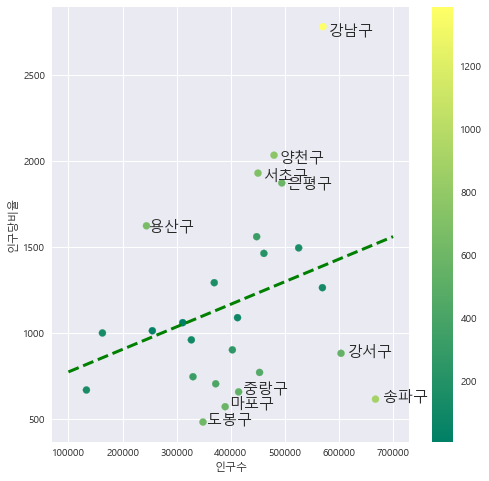

In [140]:
plt.figure(figsize=(8,8))
#1
plt.scatter(data_result['인구수'], data_result['소계'],
           c = data_result['오차'],cmap='summer', s=50)
plt.plot(fx, f1(fx), ls='dashed',lw=3, color='g')

#2
#오차가 큰 순서대로 이미 정렬된 df_sort 프레임에서 0~9번째의  x,y 값에 해당하는 점에 구이름 표시하기 
for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, #1.02, 0.98은 점때문에 글자가 가려지지 않게 하기 위함(없어도 무방)
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.show()